# Minimization of $trace(W)$ by genetic algorithm

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_blobs

array([1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2,
       0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2,
       1, 2, 1, 0, 0, 0])

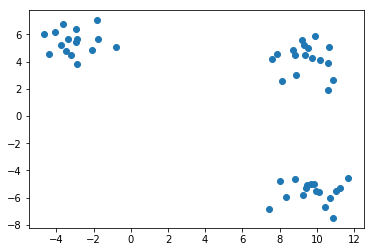

In [2]:
N_CLUSTERS = 3
samples, labels = make_blobs(n_samples=50, centers=N_CLUSTERS, random_state=24)
plt.scatter(samples[:,0], samples[:,1])
labels

In [3]:
from sklearn.metrics.pairwise import euclidean_distances

In [4]:
def cost_function(vec):
    vec = np.array(vec)
    total = 0
    try:
        for i in range(0, N_CLUSTERS):
            sample = samples[vec == i]
            total += np.trace(np.cov(sample[:, 0], sample[:, 1]))
        return total
    except ValueError:
        return 10000000

def deap_cf(vec):
    return (cost_function(vec), )

In [5]:
import random
from array import array

from deap import base
from deap import creator
from deap import tools
from deap.algorithms import eaSimple

In [6]:
creator.create('Fitness', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.Fitness)

In [14]:
toolbox = base.Toolbox()
toolbox.register('attr_int', random.randint, 0, N_CLUSTERS-1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_int, 50)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('evaluate', deap_cf)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutUniformInt, low=0, up=N_CLUSTERS-1, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)


In [17]:
random.seed(0)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(5)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=200, stats=stats, halloffame=hof)

gen	nevals	avg    	std    	min    	max    
0  	300   	188.146	7.16246	161.462	203.839
1  	244   	184.283	8.09814	136.91 	201.481
2  	242   	179.675	9.78311	121.433	200.036
3  	244   	174.737	11.6556	122.744	195.48 
4  	246   	169.883	13.1209	129.112	196.935
5  	254   	164.827	14.2531	125.58 	197.06 
6  	256   	157.597	15.6992	114.343	197.34 
7  	260   	145.523	14.6955	104.481	186.042
8  	253   	134.764	13.8432	96.537 	173.044
9  	250   	124.683	13.0854	88.6051	162.949
10 	260   	116.126	13.7251	71.2031	152.385
11 	252   	106.508	13.3831	65.4794	146.762
12 	259   	96.9348	12.4511	61.0935	135.766
13 	224   	88.2334	11.9099	57.2367	131.099
14 	254   	79.9415	9.94057	53.428 	110.02 
15 	259   	74.3567	10.4895	51.5778	119.223
16 	249   	69.3807	9.75859	37.6868	132.541
17 	242   	65.325 	10.2235	37.6868	103.395
18 	251   	61.0977	8.67422	34.7936	106.545
19 	260   	56.2403	8.66557	30.5464	86.5104
20 	250   	52.745 	10.0488	30.5464	103.392
21 	247   	48.4622	9.69262	32.2492	87.7753
22 	249   	

6.091936917565591


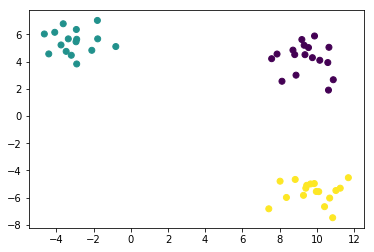

In [16]:
picked = hof[0]
plt.scatter(samples[:,0], samples[:,1], c=picked)
print(cost_function(picked))